In [133]:
import ugradio
import ugradio.timing as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy.table import Table

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

# 6.1 The Receiving System

### 6.1.2 Analog Down Converter

In [136]:
test=np.load('test.npy')

In [137]:
print(np.allclose(test[0], test[1]))

data = test[0] + 1j * test[1]

fft = np.fft.fftshift(np.fft.fft(data))
power = np.abs(fft)**2
freqs = np.fft.fftshift(np.fft.fftfreq(16000, 1/62.5))
print(test)

False
[[[ 768  768  256 ...  768    0 1536]]

 [[ 512    0  256 ... 1792 -768  768]]]


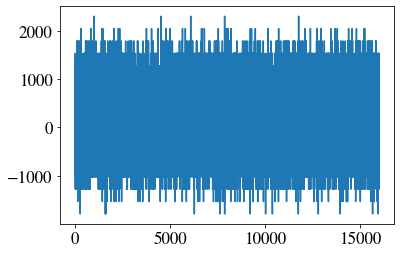

In [138]:
plt.plot(test[0,0] - test[1,0])

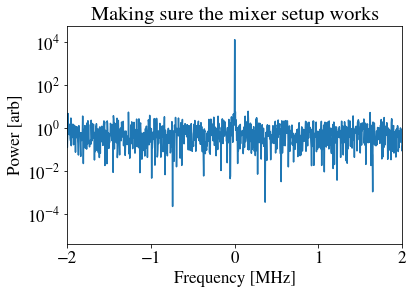

In [139]:
plt.semilogy(freqs, power[0]/2**32)
plt.xlim(-2,2)
plt.title('Making sure the mixer setup works')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb]')
# plt.vlines(0.)
plt.show()

In [140]:
#np.save('Data_lab2/test.npy', test) #Confirms mixer setup works --- we see a peak at 0.5, as expected

## 6.2 Your Measurement

In [141]:
#zenith = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1)
# pointing the horn directly at zenith
zenith=np.load('zenith.npy')

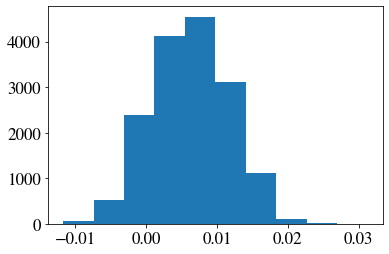

In [142]:
zenith_data = zenith[0] + 1j*zenith[1]

flattened = (zenith_data/2**16).flatten()

plt.hist(flattened, bins=10)
plt.show()

### 6.2.1 Planning Observations

### 6.2.2 Two Frequency-Switched Line Measurements (long integration)

In [143]:
# d = np.array([])
# a = np.ones((2, 1, 16000))
# b = np.ones((2, 1, 16000))
# d = np.append(d, )

In [144]:
# data = np.array([])
# for i in range(10):
#     line_off_data = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1, nblocks=1000)
#     data = np.append(line_off_data)

In [145]:
from tqdm import tqdm

In [6]:
data = []
for i in tqdm(range(10)):
    line_off_data = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1, nblocks=100)
    data.append(line_off_data)


100%|██████████| 10/10 [01:03<00:00,  6.34s/it]


In [146]:
final_data=np.load('picosampler_off.npy')
fft=np.fft.fft(final_data/2**16)
power=np.abs(fft)**2
avg_off=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(16000,1/62.5e6))
#np.save('picosampler_off.npy',final_data)
#np.save('picosampler_on.npy',final_data)


In [147]:
final_data=np.load('picosampler_on.npy')
fft=np.fft.fft(final_data/2**16)
power=np.abs(fft)**2
avg_on=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(16000,1/62.5e6))
#np.save('picosampler_off.npy',final_data)

Text(0.5, 1.0, '$s_{on}$ vs $s_{off}$ upper half')

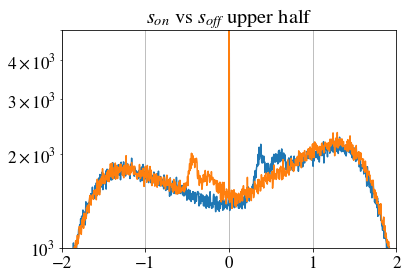

In [148]:
plt.semilogy(freqs/1e6,np.fft.fftshift(avg_on))
plt.semilogy(freqs/1e6,np.fft.fftshift(avg_off))
#plt.plot(freqs/1e6,np.fft.fftshift(avg_on/avg_off))
plt.xlim(-2,2)
#plt.ylim(0.5,1.5
plt.grid()
plt.ylim(10**3,5*10**3)
plt.title('$s_{on}$ vs $s_{off}$ upper half')


SDR

In [149]:
data_on=np.load('on_line_raw.npy')
data_off=np.load('off_line_raw.npy')
fft=np.fft.fft(data_on)
power=np.abs(fft)**2
avg_on=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

In [150]:
fft=np.fft.fft(data_off)
power=np.abs(fft)**2
avg_off=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

(1600, 2100)

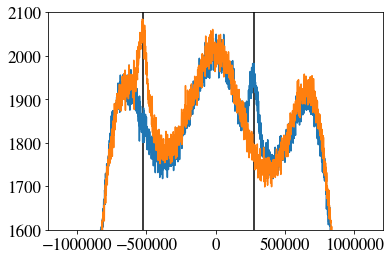

In [151]:
plt.plot(freqs,np.fft.fftshift(avg_on*1.19))
plt.plot(freqs,np.fft.fftshift(avg_off*1.19))
plt.vlines(0.275e6,0,2500)
plt.vlines(-0.525e6,0,2500)
plt.ylim(1600,2100)

In [152]:
raw_sky=np.load('cold_raw_zenith.npy').reshape(-1,2048)
blackbody_raw=np.load('cal_raw_zenith.npy')


In [153]:
fft=np.fft.fft(raw_sky)
power=np.abs(fft)**2
avg_raw=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

In [154]:
fft=np.fft.fft(blackbody_raw)
power=np.abs(fft)**2
avg_bb=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

Text(0.5, 1.0, 'Comparison of calibration measurements')

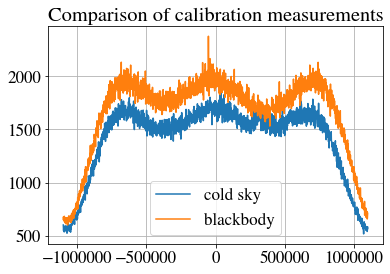

In [155]:
plt.plot(freqs,np.fft.fftshift(avg_raw),label='cold sky')
plt.plot(freqs,np.fft.fftshift(avg_bb),label='blackbody')
300/((np.mean(avg_bb[0:1296]-avg_raw[0:1296])+np.mean(avg_bb[1396:]-avg_raw[1396:]))/2)
plt.legend()
plt.grid()
plt.title('Comparison of calibration measurements')

In [156]:
data=[]
for i in range(len(avg_raw)):
    data.append(avg_bb-avg_raw)

1/(np.sum(avg_raw)/np.sum(data)*300)

1.1795324906759206

Text(0.5, 1.0, '$s_{on}$ Upper Half')

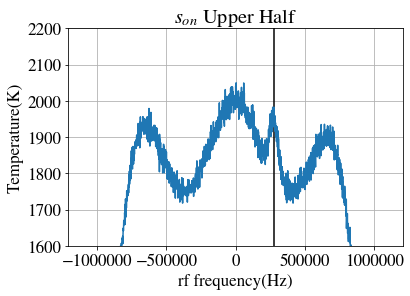

In [157]:
plt.plot(freqs,np.fft.fftshift(avg_on*1.19))
#plt.plot(freqs,np.fft.fftshift(avg_off*1.19))
plt.vlines(0.275e6,0,2500)
#plt.vlines(-0.525e6,0,2500)
plt.ylim(1600,2200)
plt.grid()
plt.ylabel('Temperature(K)')
plt.xlabel('rf frequency(Hz)')
plt.title('$s_{on}$ Upper Half')

Text(0.5, 1.0, '$s_{on}$ Lower Half')

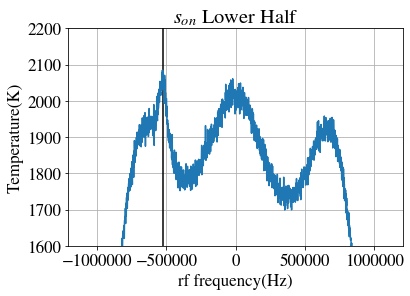

In [158]:
plt.plot(freqs,np.fft.fftshift(avg_off*1.19))
#plt.vlines(0.275e6,0,2500)
plt.vlines(-0.525e6,0,2500)
plt.ylim(1600,2200)
plt.grid()
plt.ylabel('Temperature(K)')
plt.xlabel('rf frequency(Hz)')
plt.title('$s_{on}$ Lower Half')

Text(0.5, 0, 'Frequnecy(Hz)')

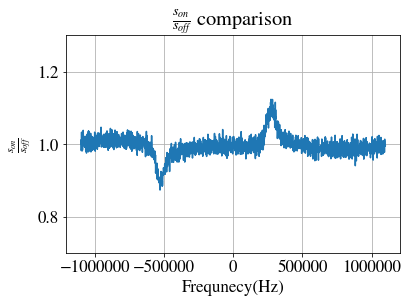

In [159]:
plt.plot(freqs,np.fft.fftshift((avg_on/avg_off)))
plt.grid()
plt.ylim(0.7,1.3)
plt.title('$\\frac{s_{on}}{s_{off}}$ comparison')
plt.ylabel('$\\frac{s_{on}}{s_{off}}$')
plt.xlabel('Frequnecy(Hz)')

Text(0.5, 1.0, 'Intensity vs doppler velocity')

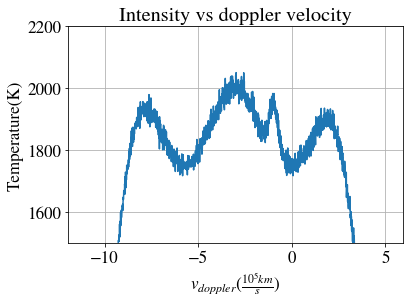

In [160]:
doppler_v=3e5*(-(.4058e6-freqs))/.4058e6-23.0823 ## doppler correction
plt.plot(doppler_v/1e5,np.fft.fftshift(avg_on*1.19))
plt.grid()
plt.ylim(1500,2200)
plt.xlabel('$v_{doppler} (\\frac{10^{5}km}{s})$')
plt.ylabel('Temperature(K)')
plt.title('Intensity vs doppler velocity')

Text(0.5, 1.0, 'Intensity vs doppler velocity $s_{on}$ lower half')

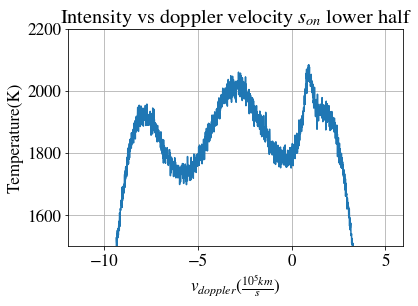

In [163]:
doppler_v=3e5*((-.4058e6-freqs))/(.4058e6)-23.08323 ## doppler correction using doppler formula
plt.plot(doppler_v/1e5,np.fft.fftshift(avg_off*1.19))
plt.grid()
plt.ylim(1500,2200)
plt.xlabel('$v_{doppler} (\\frac{10^{5}km}{s})$')
plt.ylabel('Temperature(K)')
plt.title('Intensity vs doppler velocity $s_{on}$ lower half')

### 6.2.3 Two Frequency Switched Reference Measurements (short integration)

In [ ]:
temp = ugradio.picqo.capture_data()

In [121]:
ugradio.doppler.get_projected_velocity(13.04,37.873199,2459627.65)/1000

<Quantity -23.08288309 m / s>

Section 8